# May (1974-76)


Modelo:

$$
p_{n+1} = p_n\exp r(1-p_n/K), \qquad\; \text{(} K > 0\; \text{y}\;  r > 0\text{)}
$$

Se puede considerar que $R_0= \exp r(1-p_n/K).$ Tenemos una tasa de reproducción densodependiente por una competición intraespeciez.

Veremos a continuación que se puede simpificar el número de parámetros significativos del sistema de la siguiente forma:

$x_n = p_n/K$


$$
x_{n+1} = x_n\exp r(1-x_n)
$$

Por lo tanto se tiene:
$$
f(x) = x\exp r(1-x) \qquad F(x) = \exp r(1-x)
$$
______________
Robert M. May (1974). Biological Populations with Nonoverlapping Generations: Stable Points, Stable Cycles, and Chaos. Science, Vol. 186, Issue 4164, pp. 645-647. https://doi.org/10.1126/science.186.4164.645 

Robert M. May (1976). Simple mathematical models with very complicated dynamics. Nature 261, 459–467. https://doi.org/10.1038/261459a0

#### Análisis del modelo

Cargamos los módulos que vamos a usar

In [17]:
import matplotlib.pyplot as plt
import numpy as np

Grficas de las funciones de producción y de producción _p.c._ , así como la bisectriz

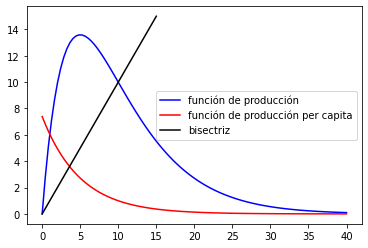

In [18]:
x = np.linspace(0,40,100) #vector con 100 elementos empezando en 0 y termina en 40
x_b = np.linspace(0,15,100)
y_p = x*np.exp(2*(1-x/10))
y_pc = np.exp(2*(1-x/10))
plt.plot(x, y_p, color ='blue', label = 'función de producción')
plt.plot(x, y_pc, color ='red', label = 'función de producción per capita')
plt.plot(x_b, x_b, '-', color ='black', label = 'bisectriz')
plt.legend()
plt.show()

Cargamos el módulo de cálculo simbólico (para hecer manipulacines como loas que realizamos al hacer cálculos matemáticos con papel y lápiz). Además le pedimos que escriba las salidas con letra de libro

In [19]:
import sympy as sp
sp.init_printing()

Definimos las variables (matemáticas) que vamos a utilizar

In [20]:
x = sp.symbols('x') #parece una redundancia pero no, en la variable x de py se está almacenando la variable simbólica x
r, K = sp.symbols('r K', positive = True)

Función de producción. Obsérvese que la defino con el módulo de cálcluo simbólico

In [21]:
f_p = x*sp.exp(r*(1-x/K))

Puntos fijos de la función de producción

In [22]:
sp.solve(f_p - x, x)

Simplifico y defino una vriable (de Python) para los puntos fijos

In [23]:
ptos_fijos = sp.solve(f_p - x, x)
ptos_fijos

In [24]:
ptos_fijos = [sp.simplify(ptos_fijos[0], inverse = True), sp.simplify(ptos_fijos[1], inverse = True)]
ptos_fijos

Estabilidad de los puntos de equilibrio

In [25]:
f_p.diff(x)

Simplifico la anterior expresión

In [26]:
sp.simplify(f_p.diff(x))

In [27]:
f_p.diff(x).subs(x, 0), f_p.diff(x).subs(x, K) 

El comportamiento del sistema depende de un solo parámetro, $r.$ Puedo utilizar las funciones de producción y de producción p.c. con el cambio de variable $p_n = Kx_n,$ como se ha hecho más arriba.

In [28]:
f_pr = x*sp.exp(r*(1-x))

In [29]:
ptos_fijos = sp.solve(f_pr - x, x)
ptos_fijos = [sp.simplify(ptos_fijos[0], inverse = True), sp.simplify(ptos_fijos[1], inverse = True)]
ptos_fijos

In [30]:
f_pr.diff(x)

In [31]:
sp.simplify(f_pr.diff(x), ratio = 1)

In [32]:
pendiente = [f_pr.diff(x).subs(x, 0), f_pr.diff(x).subs(x, 1)]
pendiente

#### Resumen del análisis de estabilidad del model

1. La estabilidad del modelo solo depende de $r.$ Por esto se analiza el modelo normalizado con $x_n = p_x/K.$

2. Hay dos punto críticos, en el modelo normalizado, son $x = 0$ y $x = 1.$ Es último correspond a $p^*= K.$

3. La solición de equilibrio nula es inestable

4. Para la soluición de equilibrio no trivial se tiene:
    - Estabilidad asintótica para $\; |1- r| < 1 \;$ o bien $\; 0<r<2.$ 
    - Inestabilidad para $\; r > 2.$ Recuérdese que consideramos $\; r > 0.$

#### Análisis gráfico del model con gráficos de telaraña

In [45]:
from telaranas import *

In [46]:
def fpr(x):  
    return x*np.exp(r*(1-x)) #el valor de la población en el instante siguiente

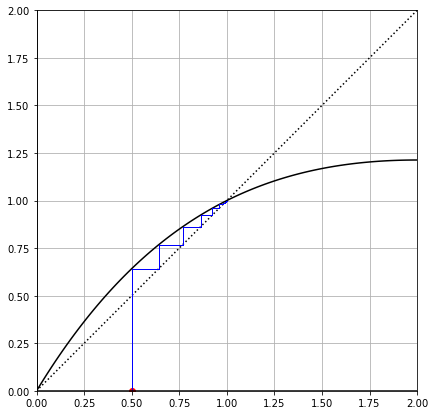

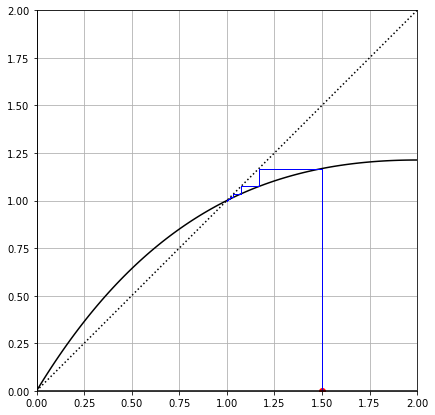

In [56]:
r = 0.5  #mira fuera del espacio definido de la función y encuentra r
cobweb_f(fpr, 0.5, 20, a = 0, b = 2)   #0.5 es la población inicial
cobweb_f(fpr, 1.5, 20, a = 0, b = 2)

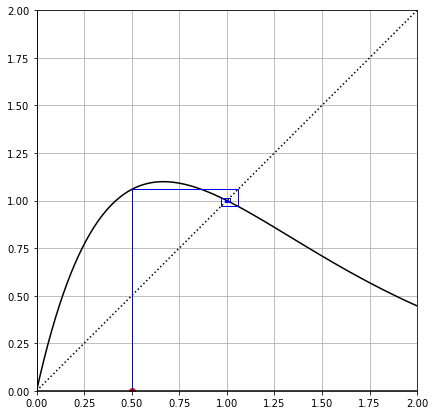

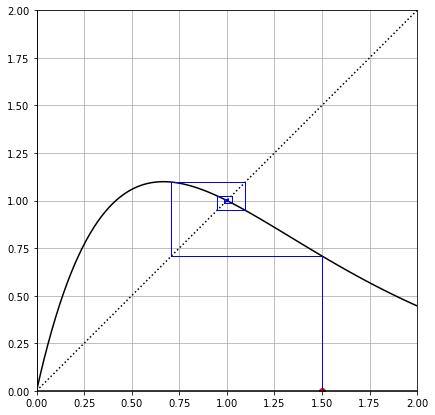

In [57]:
r = 1.5
cobweb_f(fpr, 0.5, 20, a = 0, b = 2)
cobweb_f(fpr, 1.5, 20, a = 0, b = 2)

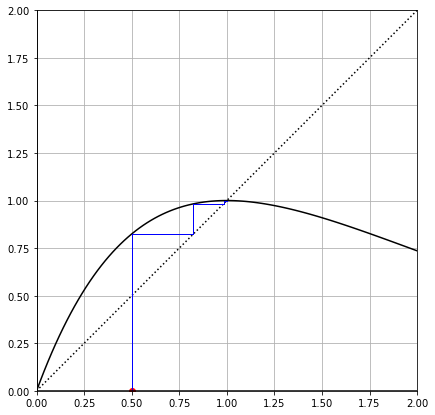

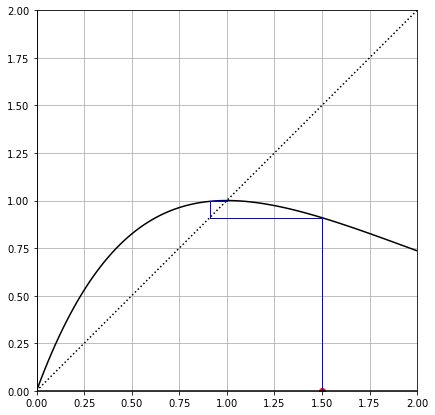

In [49]:
r = 1
cobweb_f(fpr, 0.5, 20, a = 0, b = 2)
cobweb_f(fpr, 1.5, 20, a = 0, b = 2)

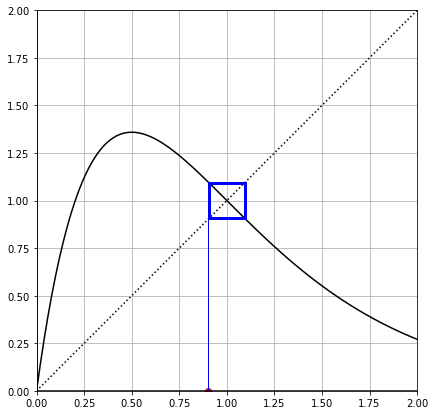

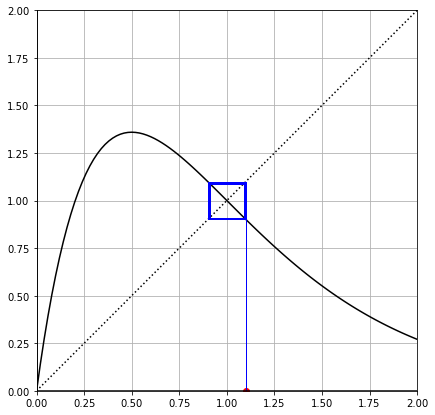

In [50]:
r = 2
cobweb_f(fpr, 0.9, 20, a = 0, b = 2)
cobweb_f(fpr, 1.1, 20, a = 0, b = 2)

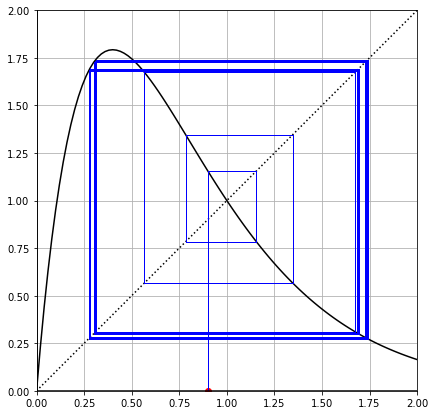

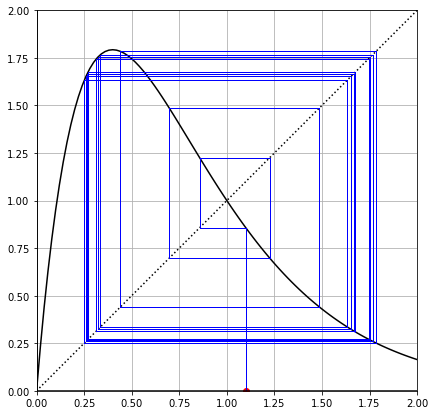

In [51]:
r = 2.5
cobweb_f(fpr, 0.9, 20, a = 0, b = 2)
cobweb_f(fpr, 1.1, 20, a = 0, b = 2)

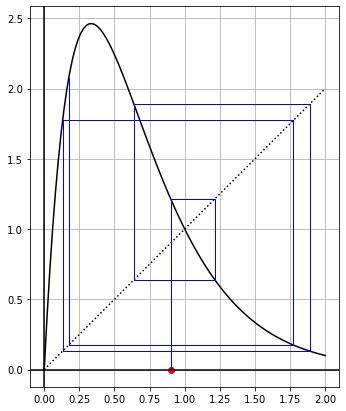

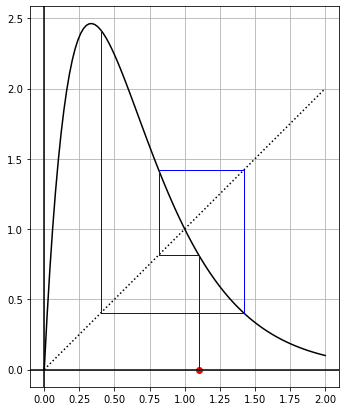

In [23]:
r = 3
cobweb_f(fpr, 0.9, 20, a = 0, b = 2)
cobweb_f(fpr, 1.1, 20, a = 0, b = 2)